In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from numpy.linalg import eig

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from numpy.linalg import eig

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree
import plotly.figure_factory as ff
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score,log_loss
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


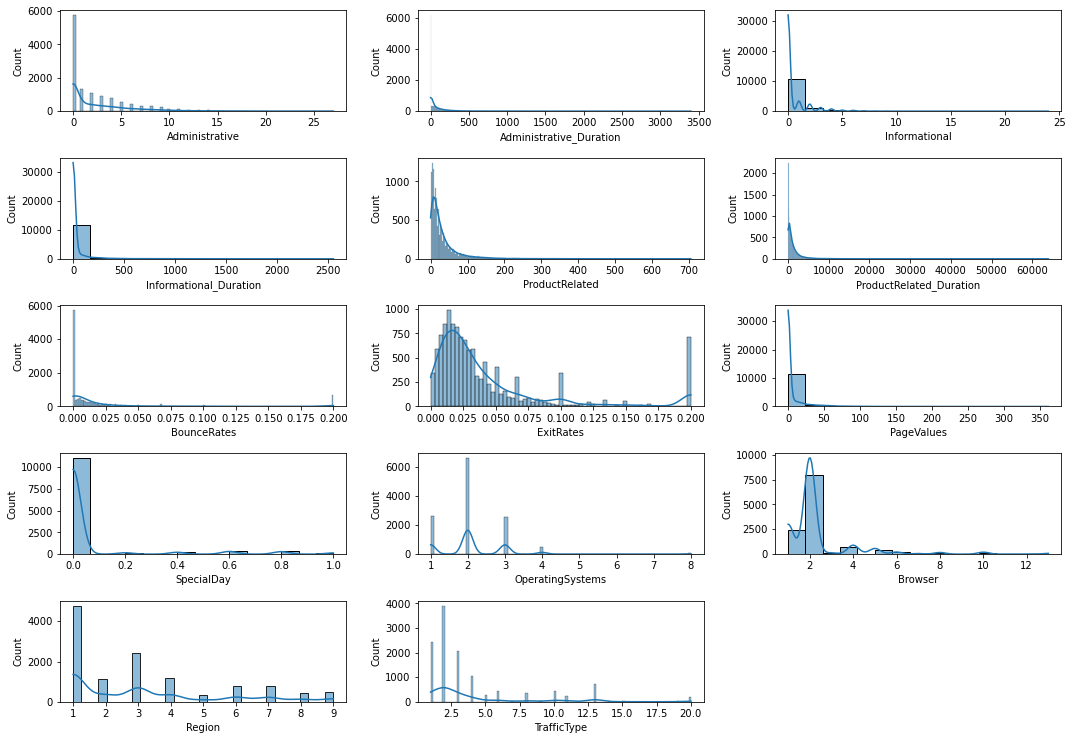

In [3]:
# Distribution plot.
n=1
plt.figure(figsize=(15,12))
for i in df.describe().columns:
    plt.subplot(6,3,n)
    n+=1
    sns.histplot(df[i],kde=True,palette='Spectral')
    plt.tight_layout()

In [4]:
# Check for null values.
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

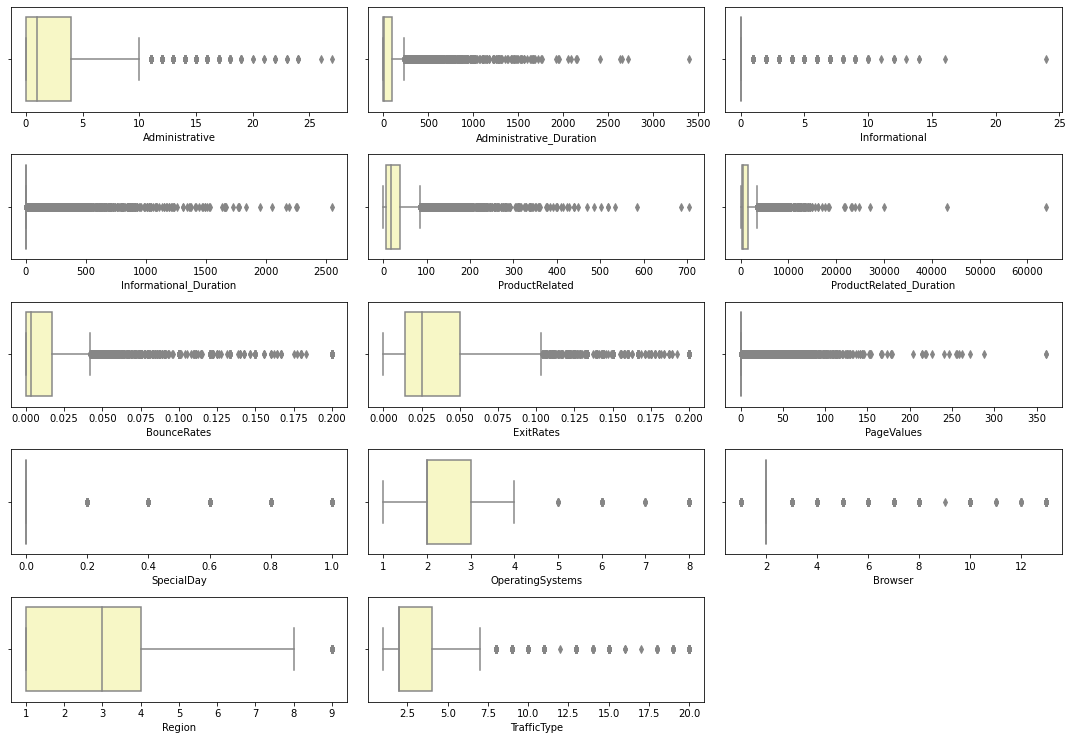

In [5]:
# Check for outliers.
n=1
plt.figure(figsize=(15,12))
for i in df.describe().columns:
    plt.subplot(6,3,n)
    n+=1
    sns.boxplot(df[i],palette='Spectral')
    plt.tight_layout()

In [6]:
# Treatment of outliers.
for i in df.describe().columns:
    ll,q1,q3,ul=df[i].quantile([0.03,0.25,0.75,0.95])
    LL=q1-1.5*(q3-q1)
    UL=q3+1.5*(q3-q1)
    df[i]=df[i].apply(lambda x: ll if x<LL else ul if x> UL else x)

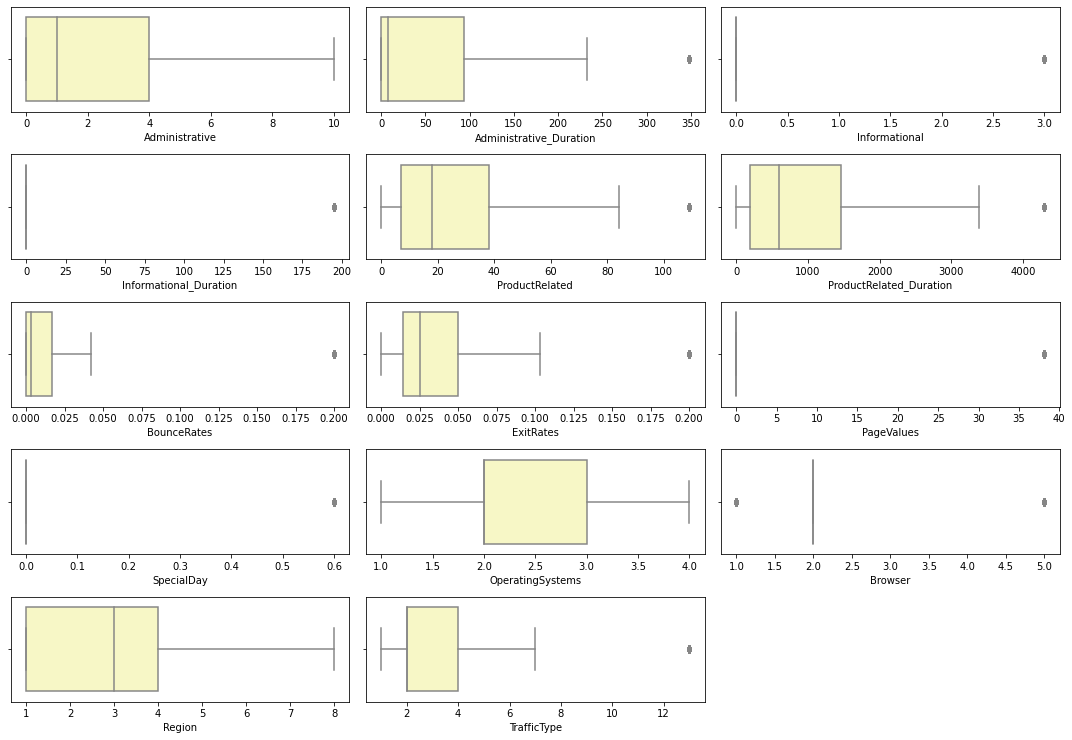

In [7]:
# After removing outliers.
n=1
plt.figure(figsize=(15,12))
for i in df.describe().columns:
    plt.subplot(6,3,n)
    n+=1
    sns.boxplot(df[i],palette='Spectral')
    plt.tight_layout()

In [8]:
#Numeric columns

col=df.describe().columns

In [9]:
df[col]=df[col].apply(lambda x: (x-x.mean())/x.std())

In [10]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.762290,-0.639556,-0.52081,-0.492237,-0.919986,-0.875287,2.610254,2.907690,-0.533247,-0.336017,Feb,-1.431026,-1.024852,-0.912842,-0.781755,Returning_Visitor,False,False
1,-0.762290,-0.639556,-0.52081,-0.492237,-0.886722,-0.822494,-0.475149,1.031199,-0.533247,-0.336017,Feb,-0.111018,-0.214253,-0.912842,-0.540393,Returning_Visitor,False,False
2,-0.762290,-0.639556,-0.52081,-0.492237,-0.919986,-0.875287,2.610254,2.907690,-0.533247,-0.336017,Feb,2.528999,-1.024852,2.121410,-0.299031,Returning_Visitor,False,False
3,-0.762290,-0.639556,-0.52081,-0.492237,-0.886722,-0.873087,2.610254,2.907690,-0.533247,-0.336017,Feb,1.208990,-0.214253,-0.479377,-0.057669,Returning_Visitor,False,False
4,-0.762290,-0.639556,-0.52081,-0.492237,-0.620613,-0.357667,-0.166609,0.092954,-0.533247,-0.336017,Feb,1.208990,2.217543,-0.912842,-0.057669,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.293505,0.725894,-0.52081,-0.492237,0.809722,0.596149,-0.364956,-0.300535,1.875153,-0.336017,Dec,2.528999,2.217543,-0.912842,-0.781755,Returning_Visitor,True,False
12326,-0.762290,-0.639556,-0.52081,-0.492237,-0.786932,-0.491093,-0.475149,-0.444974,-0.533247,-0.336017,Nov,1.208990,-0.214253,-0.912842,2.114590,Returning_Visitor,True,False
12327,-0.762290,-0.639556,-0.52081,-0.492237,-0.753668,-0.723301,2.610254,0.781001,-0.533247,-0.336017,Nov,1.208990,-0.214253,-0.912842,2.114590,Returning_Visitor,True,False
12328,0.645436,0.066711,-0.52081,-0.492237,-0.454295,-0.589874,-0.475149,-0.450241,-0.533247,-0.336017,Nov,-0.111018,-0.214253,-0.045913,2.114590,Returning_Visitor,False,False


In [11]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [12]:
# Categorical columns
df_cat=df.select_dtypes(exclude=np.number)
df_cat
df=pd.get_dummies(columns=df_cat.columns,data=df,drop_first=True)

In [27]:
# Clustering.
wcss=[]
for i in range(1,10):
    k_model=KMeans(n_clusters=i,random_state=10)
    k_model.fit(df)
    wcss.append(k_model.inertia_)

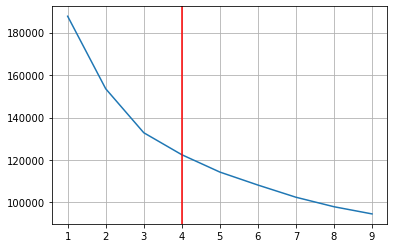

In [31]:
# Plotling for suitable number clusters
plt.plot(range(1,10),wcss)
plt.axvline(x=4,color='red')
plt.grid(True)

In [33]:
for i in range(2,10):
    k_model=KMeans(n_clusters=i,random_state=10)
    predict=k_model.fit_predict(df)
    score=silhouette_score(df,predict)
    print('For cluster {},Silhouette score is {}'.format(i,score))

For cluster 2,Silhouette score is 0.22384683388119547
For cluster 3,Silhouette score is 0.22447669837145
For cluster 4,Silhouette score is 0.18524909874120762
For cluster 5,Silhouette score is 0.19652576079442563
For cluster 6,Silhouette score is 0.19699283991163802
For cluster 7,Silhouette score is 0.17986121265811925
For cluster 8,Silhouette score is 0.18086314379552157
For cluster 9,Silhouette score is 0.1470996922440255


In [15]:
for i in range(2,10):
    k_model=KMeans(n_clusters=i,random_state=10)
    predict=k_model.fit_predict(df)
    score=silhouette_score(df,predict)
    print('For cluster {},silhouette score is {}'.format(i,score))

For cluster 2,silhouette score is 0.22384683388119547
For cluster 3,silhouette score is 0.22447669837145
For cluster 4,silhouette score is 0.18524909874120762
For cluster 5,silhouette score is 0.19652576079442563
For cluster 6,silhouette score is 0.19699283991163802
For cluster 7,silhouette score is 0.17986121265811925
For cluster 8,silhouette score is 0.18086314379552157
For cluster 9,silhouette score is 0.1470996922440255


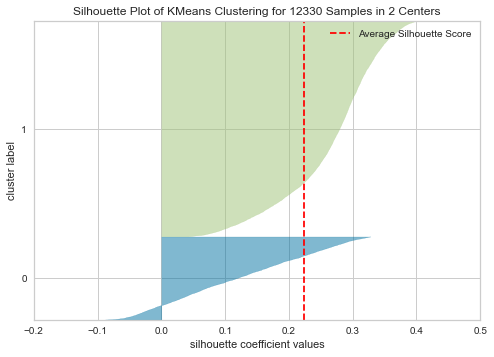

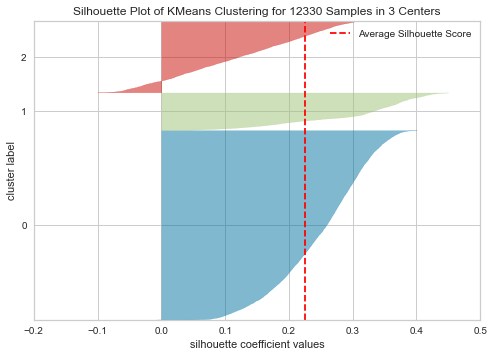

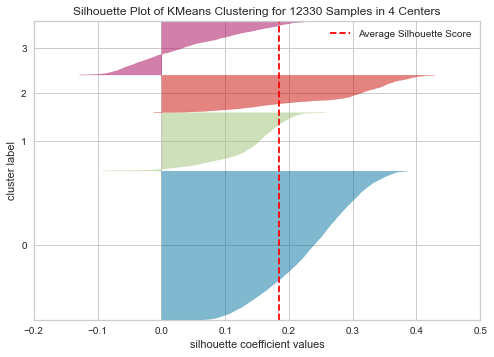

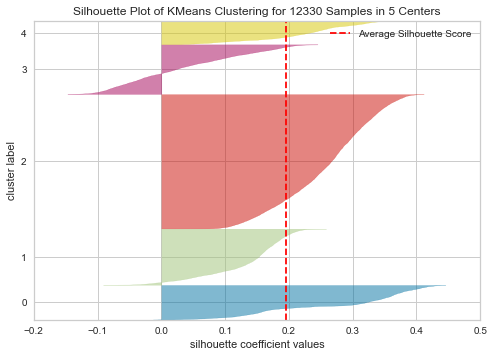

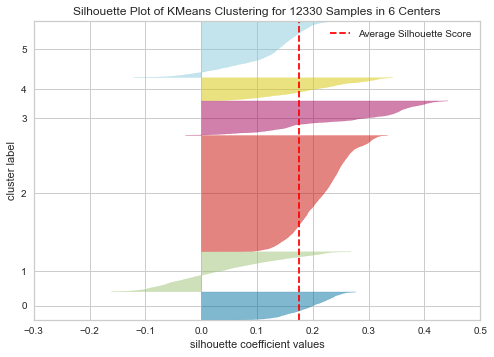

In [34]:
# Visualize
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
X,y=load_credit()
X = df
n=[2,3,4,5,6]
for i in n:
    silhouette_visualizer(KMeans(i, random_state=42), X, colors='yellowbrick')
    i+=1

In [35]:
# Hierarchical Clustering
link_mat=linkage(df)

<Figure size 576x396 with 0 Axes>

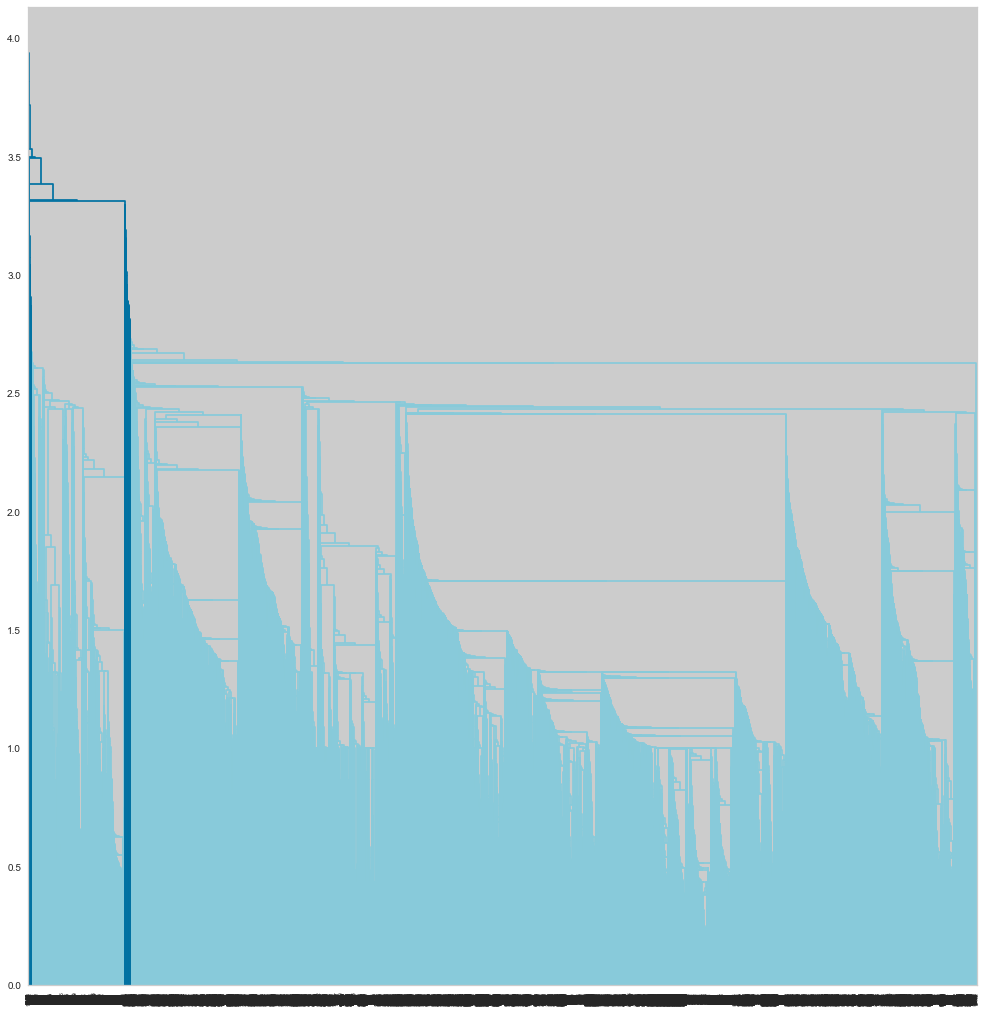

<Figure size 576x396 with 0 Axes>

In [38]:
plt.figure(figsize=(17,18))
hierarchy.dendrogram(link_mat)
plt.figure()

In [39]:
link_list=['ward', 'complete', 'average', 'single']
for i in link_list:
    agl_model=AgglomerativeClustering(n_clusters=3,linkage=i)
    predict=agl_model.fit_predict(df)
    score=silhouette_score(df,predict)
    print('For cluster {},Silhouette score is {}'.format(i,score))

For cluster ward,Silhouette score is 0.22373430933684255
For cluster complete,Silhouette score is 0.11237749791785248
For cluster average,Silhouette score is 0.2131469918852207
For cluster single,Silhouette score is 0.21890420643393202


In [40]:
# Agglomerative MOdel
agl_model=AgglomerativeClustering(n_clusters=2,linkage='ward')
agl_model.fit(df)

AgglomerativeClustering()

In [41]:
# Clusters
mdf=df.copy()
mdf['Cluster']=agl_model.labels_

In [48]:
#DB Scan model is radius method for suitable number of clusters.

db_model=DBSCAN(eps=0.9,min_samples=20)
db_model.fit(df)

DBSCAN(eps=0.9, min_samples=20)

In [49]:
ndf=df.copy()
ndf['Cluster']=db_model.labels_

<AxesSubplot:xlabel='Cluster', ylabel='count'>

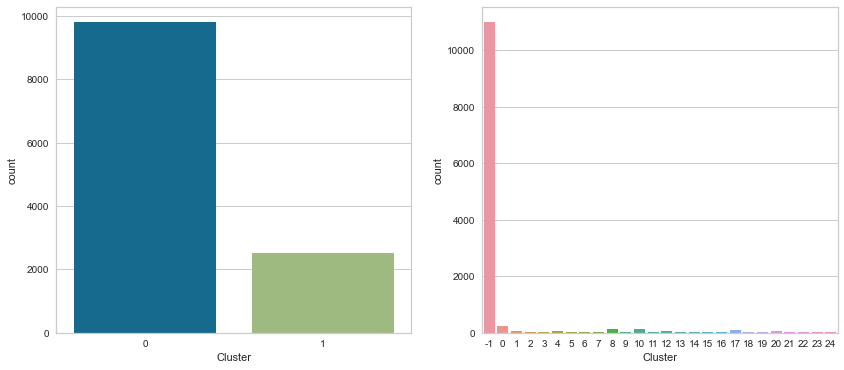

In [50]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(mdf['Cluster'])
plt.subplot(1,2,2)
sns.countplot(ndf['Cluster'])

In [53]:
# PCA Model for reduce the dimensionality of data and decreases the multicollinearity of data.

cov_mat=np.cov(df.T)

In [54]:
eig_values,eig_vec=np.linalg.eig(cov_mat)
print(eig_values)
print(eig_vec)

[4.00225209e+00 1.58108974e+00 1.21539616e+00 1.13631926e+00
 1.11558703e+00 9.47992980e-01 9.89773620e-01 9.95354387e-01
 8.37569979e-01 7.75337129e-01 2.29002912e-01 2.03775450e-01
 1.78089288e-01 1.61086816e-01 1.54881807e-01 1.42953603e-01
 1.36820383e-01 1.03969972e-01 7.18136936e-02 3.52157782e-03
 6.17317134e-03 1.55677028e-02 6.20560915e-02 5.46529229e-02
 2.52282647e-02 3.53532884e-02 4.05767179e-02]
[[-3.65676510e-01 -3.24318081e-02 -2.63921992e-02  4.67330230e-01
   7.01315980e-02  2.33542261e-01 -1.13353118e-01  6.19662566e-02
  -9.85340459e-02 -1.31610300e-01  6.92498801e-01 -3.45124902e-02
  -2.47264018e-02  7.95135952e-02  1.06525922e-01  1.26089728e-01
  -1.56044387e-01 -3.58194640e-02 -4.18780409e-02  7.45765331e-04
   1.65571656e-04 -2.91209775e-03  2.41281770e-02 -4.03357037e-03
   2.29174761e-03 -5.43414561e-03 -7.29809508e-04]
 [-3.30179182e-01 -4.48925213e-02 -4.43064903e-02  5.30219700e-01
   1.07181198e-01  2.64550190e-01 -1.33586887e-01  8.38010900e-02
  -1.157

In [58]:
# Eigen values for first 5 PCA features are more than 1.So,Taking 5 features is quite suitable.

In [56]:
#Features for PCA.
eig_vector=eig_vec[:,[0,1,2,3,4]]

In [57]:
df1=pd.DataFrame(data=eig_vector,columns=['PC1','PC2','PC3','PC4','PC5'])
df1.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-0.365677,-0.032432,-0.026392,0.467330,0.070132
1,-0.330179,-0.044893,-0.044306,0.530220,0.107181
2,-0.338995,-0.415571,-0.175116,-0.334693,0.244426
3,-0.338541,-0.414266,-0.173449,-0.334982,0.250757
4,-0.377008,-0.035453,0.242954,-0.060127,-0.357350


In [61]:
#PCA features.
pca_model=PCA(n_components=5,random_state=10)
components=pca_model.fit_transform(df)

In [62]:
df2=pd.DataFrame(data=components,columns=['PC1','PC2','PC3','PC4','PC5'])
df2.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-3.180639,2.377633,-1.805086,1.049279,-1.246037
1,-1.764891,-0.293120,-0.791102,-0.315121,-0.178754
2,-3.225308,2.437251,0.990532,1.181179,1.275231
3,-3.211045,2.501672,0.439563,0.984246,0.079547
4,-1.316398,-0.659053,1.498900,-0.840624,0.796041


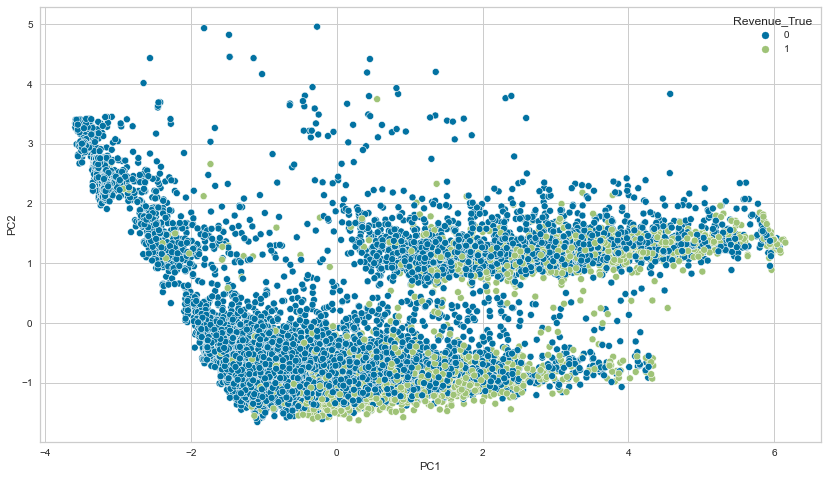

In [70]:
# Scatter of  Clusters.
plt.figure(figsize=(14,8))
target=df['Revenue_True']
visual=pd.concat([df2,target],axis=1)
sns.scatterplot(x='PC1',y='PC2',hue='Revenue_True',data=visual)
plt.show()

# Classification Problems can be solved in certain way for better Prediction.

In [156]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Revenue_True']),df['Revenue_True'],test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8631, 26)
(3699, 26)
(8631,)
(3699,)


In [157]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [158]:
# Model creation
logreg_model=sm.Logit(y_train,x_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Revenue_True   No. Observations:                 8631
Model:                          Logit   Df Residuals:                     8604
Method:                           MLE   Df Model:                           26
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                     inf
Time:                        18:19:50   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.0817      0.232     -8.966      0.000  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [159]:
#ODDS for LOgistic model.
pd.DataFrame(np.exp(logreg_model.params),columns=['ODD']).sort_values(by='ODD',ascending=False).head(10)

,ODD
PageValues,4.869154
Month_Nov,2.583337
Month_Jul,1.218832
Informational,1.122771
TrafficType,1.062459
Browser,1.047940
ProductRelated_Duration,1.044548
Month_Oct,1.039588
BounceRates,1.033667
Weekend_True,1.009720


In [160]:
y_pred=logreg_model.predict(x_test)
y_pred_prob=[0 if x<0.5 else 1 for x in y_pred]

<AxesSubplot:>

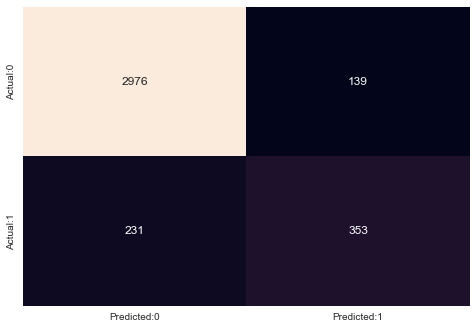

In [161]:
# Confusion Matrix.
cm=confusion_matrix(y_test,y_pred_prob)
matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)

In [162]:
# Classification Report for Model

print(classification_report(y_test,y_pred_prob))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3115
           1       0.72      0.60      0.66       584

    accuracy                           0.90      3699
   macro avg       0.82      0.78      0.80      3699
weighted avg       0.89      0.90      0.90      3699



Text(0.04, 0.7, "('AUC:', 0.7799146309285605)")

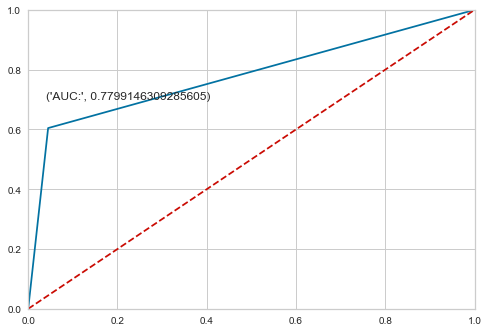

In [163]:
# ROC-Curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x=0.04,y=0.7,s=('AUC:',metrics.roc_auc_score(y_test,y_pred_prob)))

In [164]:
# Younden Index method for better Cutoff Values.

youden_frame=pd.DataFrame({'FPR':fpr,'TPR':tpr,'THRESHOLD':thresholds})
youden_frame['DIFF']=youden_frame['TPR']-youden_frame['FPR']

In [165]:
youden_frame

# From Youden Index, optimal cutoff value is 0.55 

,FPR,TPR,THRESHOLD,DIFF
0,0.000000,0.000000,2,0.000000
1,0.044623,0.604452,1,0.559829
2,1.000000,1.000000,0,0.000000


In [180]:
# Decision Tree for optimic the model quality.

decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

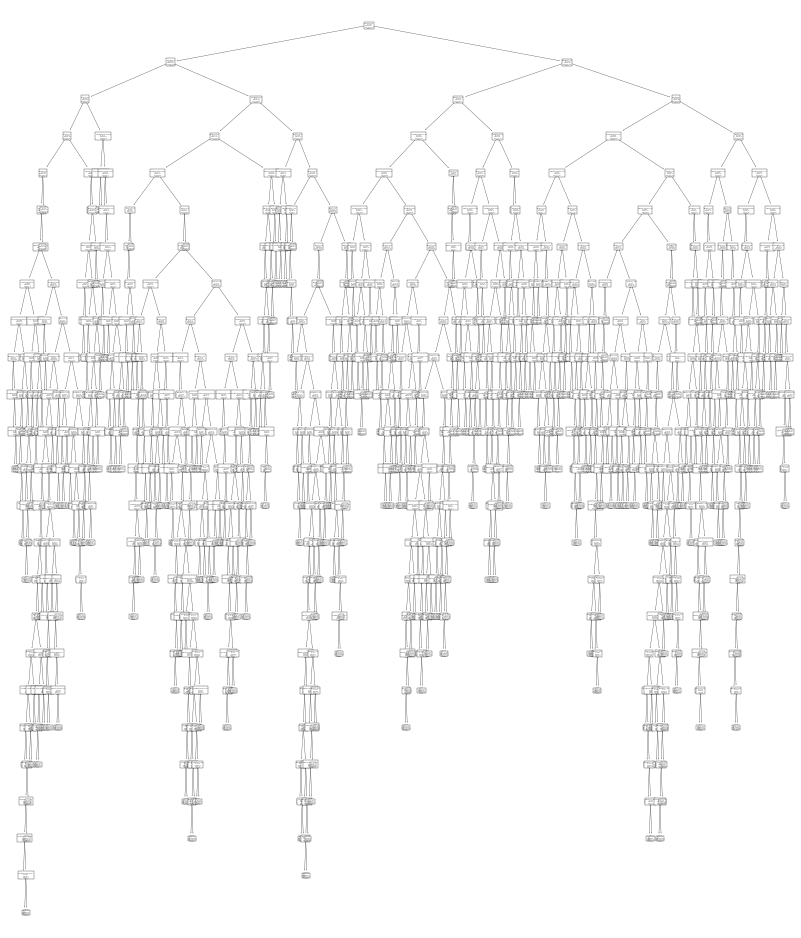

In [111]:
plt.figure(figsize=(14,17))
_=tree.plot_tree(decision_tree,feature_names=x_train.columns,class_names=['0','1'])

<AxesSubplot:>

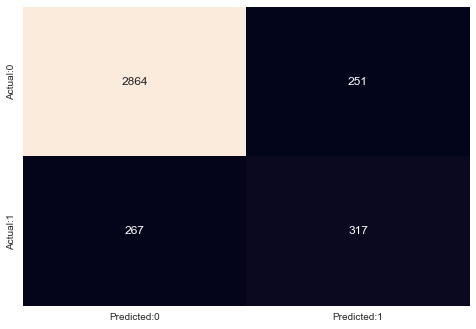

In [167]:
y_pred=decision_tree.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)

In [168]:
print(classification_report(y_test,y_pred))

# Accuracy score descrease after decision tree.

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3115
           1       0.56      0.54      0.55       584

    accuracy                           0.86      3699
   macro avg       0.74      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699



# For obtain Optimal Number of Hyperparameter, We have to do GridSearchCV

In [169]:
tuned_param=[{'criterion':['gini','entropy'],
    'splitter':['best'],
    'max_depth':range(1,6),
    'min_samples_split':range(2,6),
    'min_samples_leaf':range(2,6)}]

In [179]:
decision_tree=DecisionTreeClassifier()
grid_model=GridSearchCV(estimator=decision_tree,param_grid=tuned_param,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 6),
                          'min_samples_leaf': range(2, 6),
                          'min_samples_split': range(2, 6),
                          'splitter': ['best']}])

In [171]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

<AxesSubplot:>

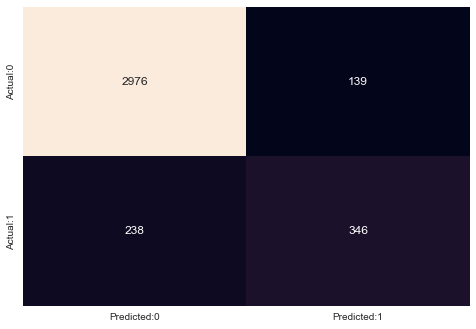

In [172]:
# Confusion Matrix
y_pred=grid_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)

In [173]:
# Classification Factor
print(classification_report(y_test,y_pred))

# Accuracy Score increases after optimal hyperparameter.

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3115
           1       0.71      0.59      0.65       584

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



In [174]:
random_forest=RandomForestClassifier(criterion='gini',max_depth=3,min_samples_leaf=2,min_samples_split=2)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2)

<AxesSubplot:>

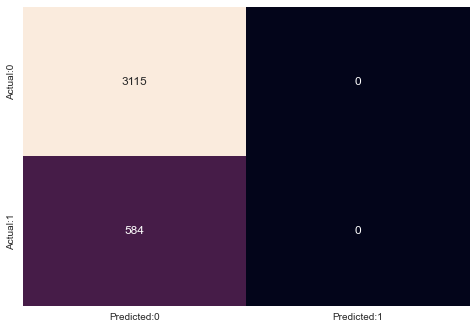

In [175]:
# Confusion Matrix
y_pred=random_forest.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)

(0.0, 1.0)

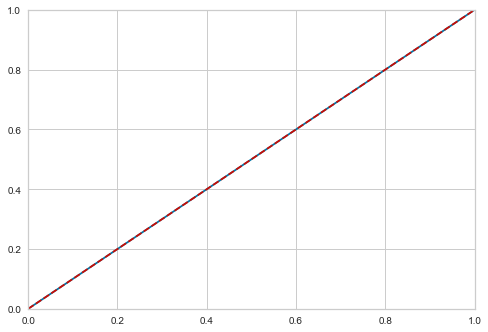

In [176]:
# ROC-CURVE
fpr,tpr,thresholds=roc_curve(y_test,random_forest.predict(x_test))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

In [177]:
# Classification Factor
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3115
           1       0.00      0.00      0.00       584

    accuracy                           0.84      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.71      0.84      0.77      3699



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


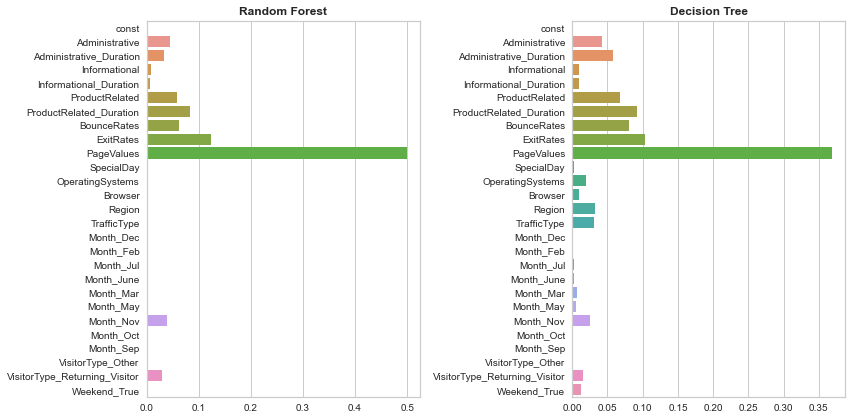

In [181]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=random_forest.feature_importances_,y=x_train.columns)
plt.title('Random Forest',weight='bold')
plt.subplot(1,2,2)
sns.barplot(x=decision_tree.feature_importances_,y=x_train.columns)
plt.title('Decision Tree',weight='bold')
plt.tight_layout()

# Boosting Methods

In [141]:
ada_model=AdaBoostClassifier(random_state=10)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=10)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3115
           1       0.70      0.52      0.60       584

    accuracy                           0.89      3699
   macro avg       0.81      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699



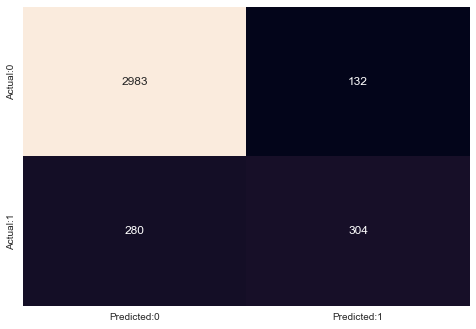

In [142]:
y_pred=ada_model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(data=matrix,annot=True,fmt='d',cbar=False)

#Accuracy
print(classification_report(y_test,y_pred))

Text(0.02, 0.7, "('AUC Score:', 0.7391)")

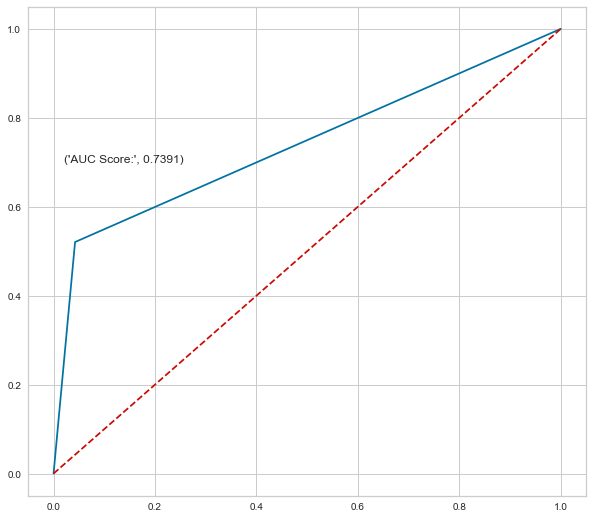

In [149]:
# ROC-CURVE
plt.figure(figsize=(10,9))
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.grid(True)
plt.text(x = 0.02, y = 0.7, s = ('AUC Score:', round(metrics.roc_auc_score(y_test,y_pred),4)))

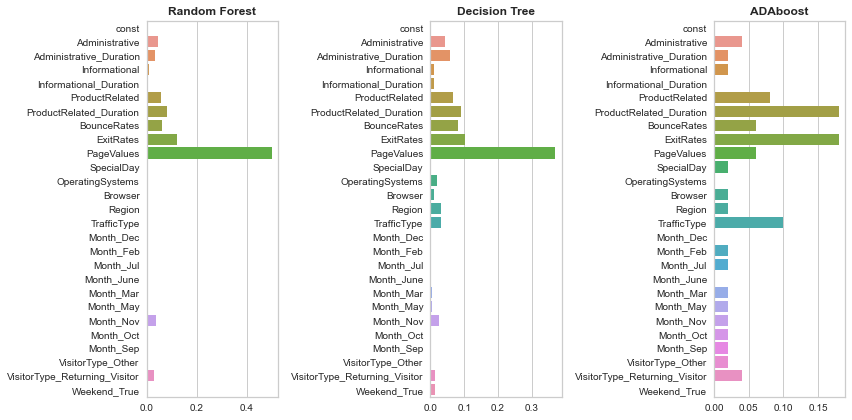

In [186]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(x=random_forest.feature_importances_,y=x_train.columns)
plt.title('Random Forest',weight='bold')
plt.subplot(1,3,2)
sns.barplot(x=decision_tree.feature_importances_,y=x_train.columns)
plt.title('Decision Tree',weight='bold')
plt.subplot(1,3,3)
sns.barplot(x=ada_model.feature_importances_,y=x_train.columns)
plt.title('ADAboost',weight='bold')
plt.tight_layout()

# Conclusion/ Interpretion:
# After applying Adaboost model,coefficient of features are well spread and accuracy is slightly increases after Adaboost.